In [42]:
import pandas as pd
import requests
import json
import os
from dotenv import load_dotenv
import datetime
import alpaca_trade_api as tradeapi
import numpy as np

In [43]:
load_dotenv()
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

Python-dotenv could not parse statement starting at line 2


In [44]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [45]:
tickers = ["CLOV"]

In [46]:
timeframe = "1D"

In [83]:
# Get current closing prices for FB and TWTR
df = alpaca.get_barset(
    tickers,
    timeframe,
    limit = 90,
).df

# Display sample data
df.head()

CLOV                              
                           open  high    low   close   volume
time                                                         
2021-05-19 00:00:00-04:00  6.74  6.91  6.519  6.8300  8791458
2021-05-20 00:00:00-04:00  6.87  7.18  6.760  7.1126  8894884
2021-05-21 00:00:00-04:00  7.10  7.30  6.920  6.9350  7107943
2021-05-24 00:00:00-04:00  6.93  7.04  6.820  6.9282  5392644
2021-05-25 00:00:00-04:00  6.96  7.23  6.920  7.0200  5559481

In [84]:
clov_df = df.loc[:, ("CLOV")]
clov_df

,open,high,low,close,volume
time,,,,,
2021-05-19 00:00:00-04:00,6.74,6.91,6.519,6.8300,8791458
2021-05-20 00:00:00-04:00,6.87,7.18,6.760,7.1126,8894884
2021-05-21 00:00:00-04:00,7.10,7.30,6.920,6.9350,7107943
2021-05-24 00:00:00-04:00,6.93,7.04,6.820,6.9282,5392644
2021-05-25 00:00:00-04:00,6.96,7.23,6.920,7.0200,5559481
...,...,...,...,...,...
2021-09-20 00:00:00-04:00,8.00,8.20,7.735,7.8683,19159127
2021-09-21 00:00:00-04:00,7.89,7.94,7.720,7.7550,12336660
2021-09-22 00:00:00-04:00,7.99,8.13,7.780,7.8800,19148736


In [68]:
clov_close = clov_df.drop(columns=["open", "high", "low", "volume"]).pct_change().dropna()
clov_close

,close
2021-05-20,0.041376
2021-05-21,-0.024970
2021-05-24,-0.000981
2021-05-25,0.013250
2021-05-26,0.043447
...,...
2021-09-20,-0.052012
2021-09-21,-0.014400
2021-09-22,0.016119
2021-09-23,0.002538


In [80]:
clov_volume = clov_df.drop(columns=["open", "high", "low", "close"]).pct_change().dropna()
clov_volume

,volume
2021-05-20,0.011739
2021-05-21,-0.200876
2021-05-24,-0.241321
2021-05-25,0.030938
2021-05-26,0.423042
...,...
2021-09-20,0.214259
2021-09-21,-0.356095
2021-09-22,0.552182
2021-09-23,-0.200307


In [73]:
clov_pct = pd.concat([clov_close, clov_volume], axis=1)
clov_pct

,close,volume
2021-05-20,0.041376,0.011739
2021-05-21,-0.024970,-0.200876
2021-05-24,-0.000981,-0.241321
2021-05-25,0.013250,0.030938
2021-05-26,0.043447,0.423042
...,...,...
2021-09-20,-0.052012,0.214259
2021-09-21,-0.014400,-0.356095
2021-09-22,0.016119,0.552182
2021-09-23,0.002538,-0.200307


In [74]:
clov_pct.describe()

,close,volume
count,89.000000,89.000000
mean,0.006492,0.344841
std,0.115488,1.402387
min,-0.232648,-0.699262
25%,-0.032680,-0.347887
50%,-0.011669,-0.123912
75%,0.022457,0.214259
max,0.858232,6.250859


In [57]:
clov_close_std = clov_close.var() ** (1/2)
clov_close_std

    

close    0.115488
dtype: float64

In [25]:
clov_close_std = clov_df["close"].var() ** (1/2)
clov_volume_std = clov_df["volume"].var() ** (1/2)
display(close_std, volume_std)

2.577352478364007

81439159.11862369

<AxesSubplot:>

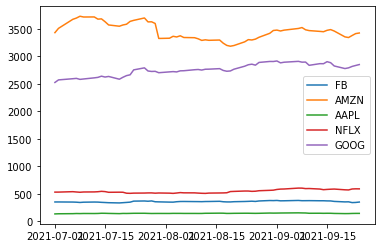

In [ ]:
closing_prices.plot()

In [ ]:
daily_returns = closing_prices.pct_change().dropna()
daily_returns.head()

,FB,AMZN,AAPL,NFLX,GOOG
2021-07-02,0.000649,0.022724,0.019596,0.000600,0.018474
2021-07-06,-0.004935,0.046918,0.014718,0.014516,0.008302
2021-07-07,-0.006688,0.006195,0.018096,-0.010431,0.002393
2021-07-08,-0.013837,0.008904,-0.008783,-0.009068,-0.006953
2021-07-09,0.013771,-0.003682,0.012490,0.009150,0.002787


<AxesSubplot:>

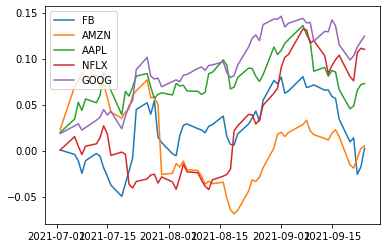

In [ ]:
daily_returns.cumsum().plot()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = pd.DataFrame(daily_returns["FB"])
y = pd.DataFrame(daily_returns["date"])

KeyError: 'date'

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)